# ARCHER Benchmark Baseline results

Baseline results for selected benchmarks run on ARCHER.

## Import required modules for results analysis

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})
import pandas as pd

In [2]:
import sys
sys.path.append('../python-modules')

In [3]:
from utilities import filemanip

## CASTEP: Large DNA Benchmark

In [4]:
from appanalysis import castep

In [5]:
castepfiles = filemanip.get_filelist('../apps/CASTEP/DNA/results/ARCHER_baseline', 'polyA20')

In [6]:
df_list = castep.create_df_list(castepfiles, 24)
castep_df = pd.DataFrame(df_list)


Peformance (SCF cycles per second): 1 threads per MPI process
           Perf                               Count
            min    median       max      mean   sum
Nodes                                              
256    0.002133  0.002133  0.002133  0.002133     1
512    0.004322  0.004322  0.004322  0.004322     1
1024   0.005996  0.005996  0.005996  0.005996     1
2048   0.009036  0.009036  0.009036  0.009036     1

Peformance (SCF cycles per second): 2 threads per MPI process
           Perf                               Count
            min    median       max      mean   sum
Nodes                                              
256    0.002149  0.002149  0.002149  0.002149     1
512    0.004492  0.004492  0.004492  0.004492     1
1024   0.006986  0.006986  0.006986  0.006986     1
2048   0.011313  0.011313  0.011313  0.011313     1

Peformance (SCF cycles per second): 4 threads per MPI process
           Perf                               Count
            min    median      

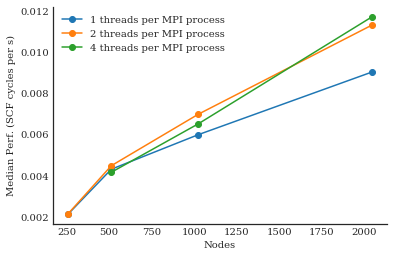

In [9]:
threading = [1, 2, 4]
for threads in threading:
    print('\nPeformance (SCF cycles per second): {0} threads per MPI process'.format(threads))
    nodes, perf_median = castep.get_perf_stats(castep_df, threads, 'median', writestats=True)
    plt.plot(nodes, perf_median, '-o', label='{0} threads per MPI process'.format(threads))
    plt.xlabel('Nodes')
    plt.ylabel('Median Perf. (SCF cycles per s)')
    plt.legend(loc='best')
    sns.despine()